# Data Visualization

In [17]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

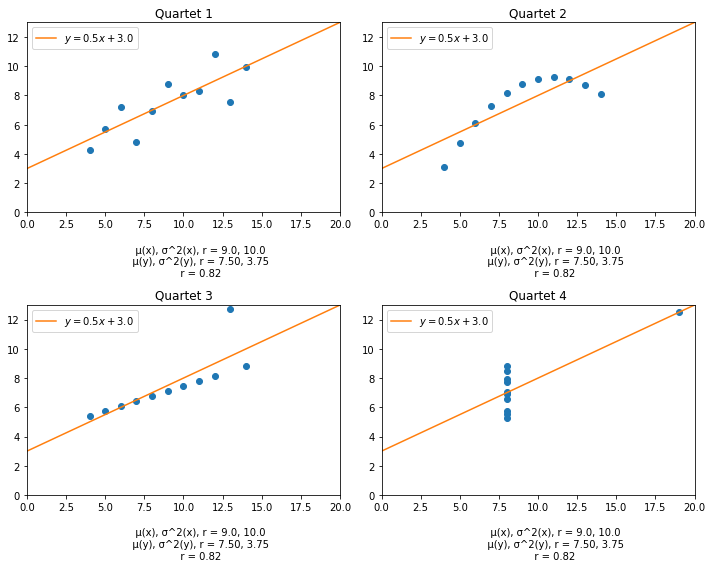

In [105]:
from scipy.stats import linregress

anscombe = np.load('anscombe.npy')
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in zip(range(0, 8, 2), axes.flatten()):

    m, c, r, p_value, σ = linregress(anscombe[:, i], anscombe[:, i+1])
    x = np.linspace(0, 20)
    ax.plot(anscombe[:, i], anscombe[:, i+1], 'o')
    ax.plot(x, c + m * x, label=f'$y = {m:.1f}x + {c:.1f}$')
    ax.set(title=f'Quartet {int(i / 2 + 1)}', 
           xlim=(0, 20), ylim=(0, 13),
           xlabel=rf'''
           μ(x), σ^2(x), r = {anscombe[:, i].mean()}, {anscombe[:, i].var()}
           μ(y), σ^2(y), r = {anscombe[:, i+1].mean():.2f}, {anscombe[:, i+1].var():.2f}
           r = {r:.2f}''')

    ax.legend()
    
plt.tight_layout()
plt.show()

The mean, variance, correlation coefficient and linear regression parameters are equal, but the distribution of the data is different.

### Problem 2

In [106]:
b = lambda n, v, x: scipy.special.binom(n, v) * x**v * (1 - x)**(n - v)

x = np.linspace(0, 1)
N = np.arange(0, 10, 1)

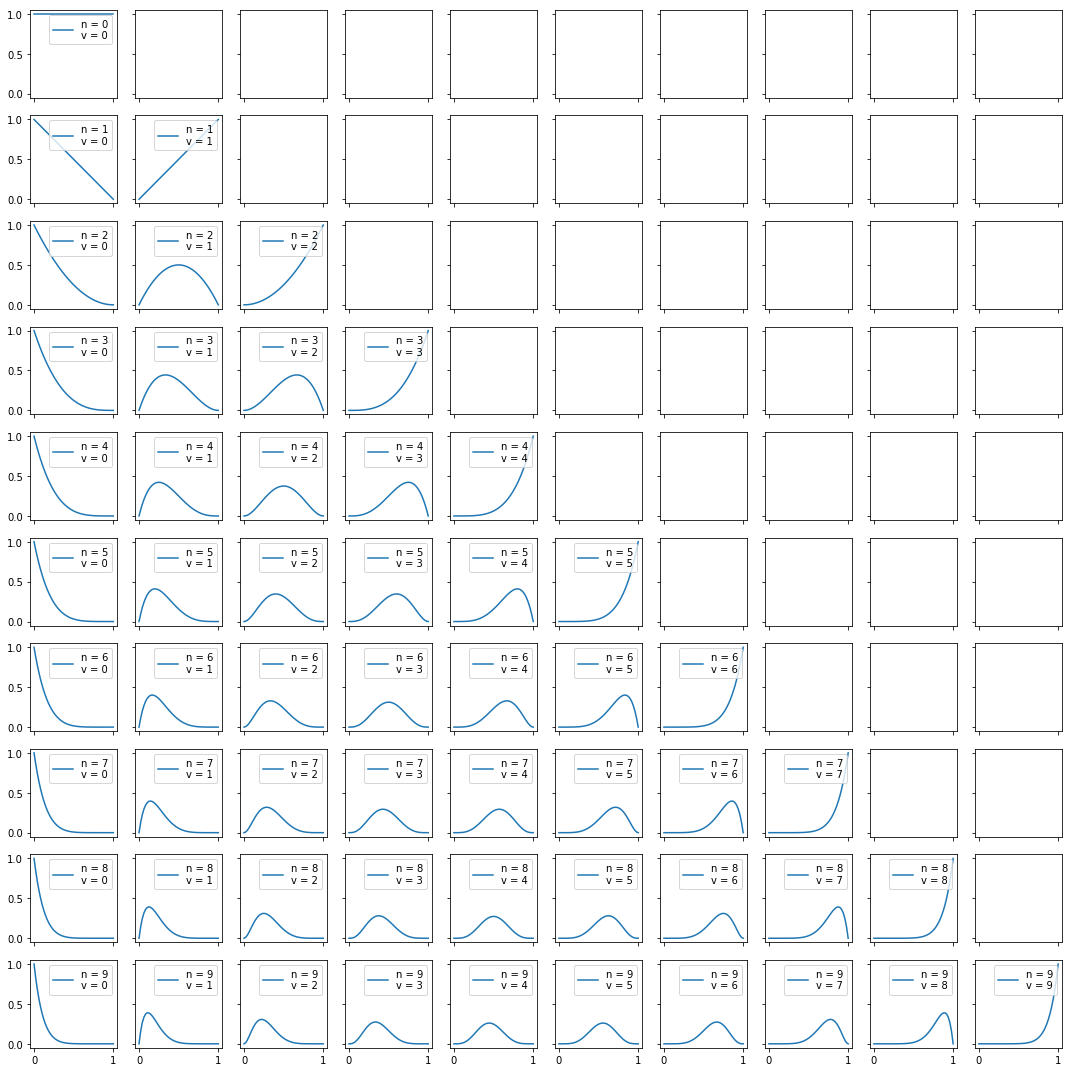

In [107]:
fig, axes = plt.subplots(len(N), 
                         len(N), 
                         figsize=(15, 15), 
                         sharex=True, 
                         sharey=True)

for n in N:
    for v in range(n+1):
        axes[n, v].plot(x, b(n, v, x), label=f"n = {n}\nv = {v}")
        axes[n, v].legend(loc='upper right')
        
plt.tight_layout()
plt.show()

### Problem 3

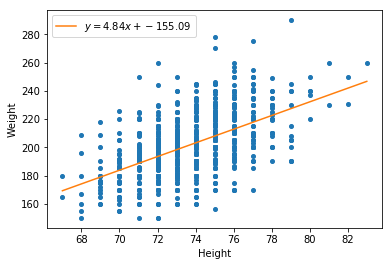

In [147]:
mlb = np.load('MLB.npy')
m, c, r, p_value, σ = linregress(mlb[:, 0], mlb[:, 1])
x = np.linspace(min(mlb[:, 0]), max(mlb[:, 0]))
plt.plot(mlb[:, 0], mlb[:, 1], 'o', ms=4)
plt.plot(x, c + m * x, label=f'$y = {m:.2f}x + {c:.2f}$')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

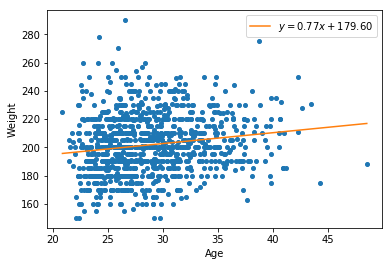

In [155]:
m, c, r, p_value, σ = linregress(mlb[:, 2], mlb[:, 1])
x = np.linspace(min(mlb[:, 2]), max(mlb[:, 2]))
plt.plot(mlb[:, 2], mlb[:, 1], 'o', ms=4)
plt.plot(x, c + m * x, label=f'$y = {m:.2f}x + {c:.2f}$')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

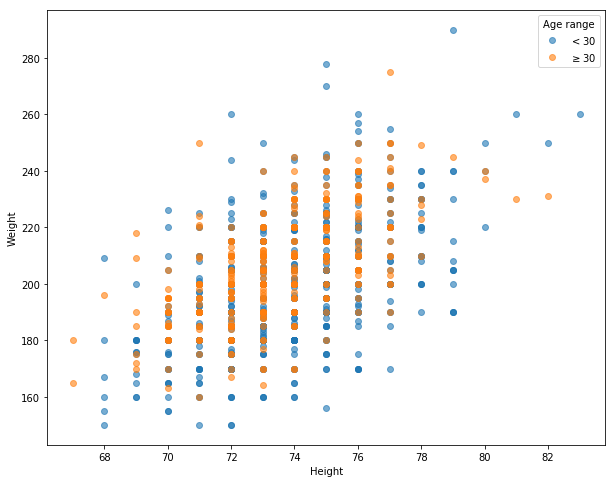

In [167]:
plt.figure(figsize=(10, 8))

age_range1 = mlb[mlb[:, 2] < 30]
age_range2 = mlb[mlb[:, 2] >= 30]
labels = ['$<30$', '$\geq 30$']
x = np.linspace(min(mlb[:, 0]), max(mlb[:, 0]))

for age_range, label in zip([age_range1, age_range2], labels):
    plt.plot(age_range[:, 0], age_range[:, 1], 'o', 
             ms=6, label=label, alpha=0.6)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Age range')
plt.show()

### Problem 4

In [189]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
year = np.array(year, dtype=int)

In [326]:
num_earthquakes = [sum(year == x) for x in np.unique(year)]

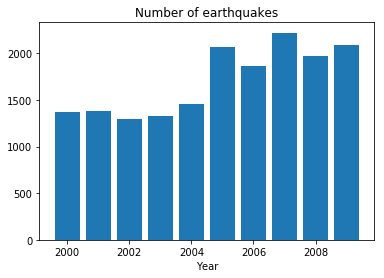

In [194]:
plt.bar(np.unique(year), num_earthquakes)
plt.title('Number of earthquakes')
plt.xlabel('Year')
plt.show()

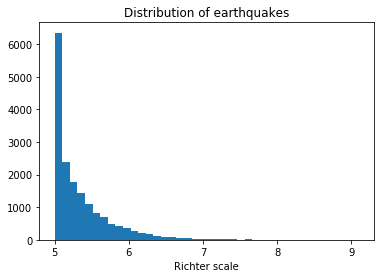

In [339]:
plt.hist(magnitude, bins=40)
plt.title('Distribution of earthquakes')
plt.xlabel('Richter scale')
plt.show()

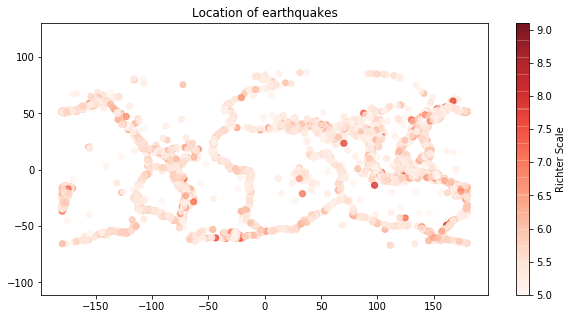

In [257]:
plt.figure(figsize=(10, 5))
plt.scatter(longitude, latitude, alpha=0.7, 
            c=magnitude, cmap='Reds')
plt.colorbar(label='Richter Scale')
plt.axis('equal')
plt.title('Location of earthquakes')
plt.show()

The strongest earthquakes occur along fault lines.

### Problem 5

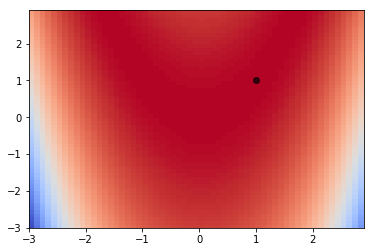

In [405]:
f = lambda x, y: (1 - x)**2 + 100 * (y - x**2)**2
min_x, max_x = -3, 3
x_grid = np.arange(min_x, max_x, 0.1)
x, y = np.meshgrid(x_grid, x_grid)

plt.pcolormesh(x, y, -f(x, y), cmap='coolwarm')
plt.scatter(1, 1, c='k', alpha=0.7)
plt.show()

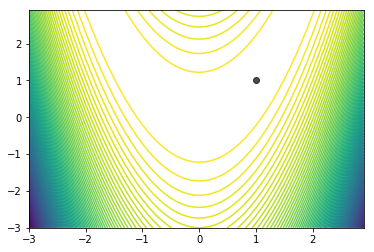

In [406]:
plt.contour(x, y, -f(x, y), 100, cmap='viridis')
plt.scatter(1, 1, c='k', alpha=0.7)
plt.show()

### Problem 6

In [364]:
pop, gdp, mheight, fheight = np.load('countries.npy').T

In [367]:
countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]
countries = np.array(countries)

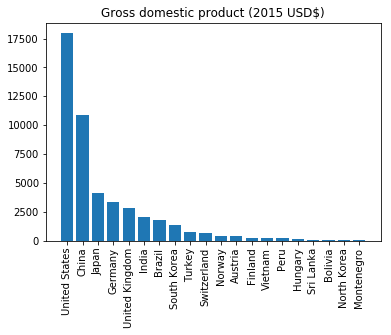

In [386]:
by_gdp = np.argsort(gdp)[::-1]
plt.bar(range(len(countries)), gdp[by_gdp])
plt.xticks(range(len(countries)), countries[by_gdp], rotation=90)
plt.title('Gross domestic product (2015 USD$)')
plt.show()

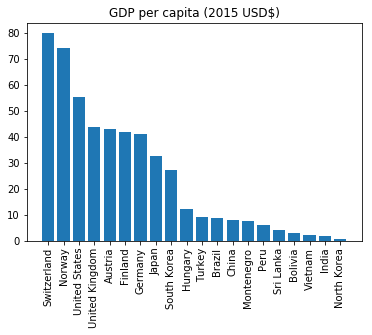

In [385]:
gdp_per_cap = gdp / pop
by_gdppc = np.argsort(gdp_per_cap)[::-1]
plt.bar(range(len(countries)), gdp_per_cap[by_gdppc])
plt.xticks(range(len(countries)), countries[by_gdppc], rotation=90)
plt.title('GDP per capita (2015 USD$)')
plt.show()

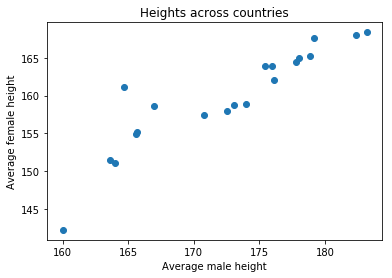

In [403]:
plt.scatter(mheight, fheight)
plt.xlabel('Average male height')
plt.ylabel('Average female height')
plt.title('Heights across countries')
plt.show()

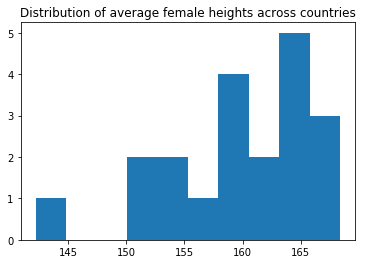

In [404]:
plt.hist(fheight, bins=10)
plt.title('Distribution of average female heights across countries')
plt.show()